## Importing the libraries:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Reading the data:

In [5]:
data = pd.read_csv('heart.csv')

In [6]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [5]:
data.shape

(1025, 14)

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.to_numpy()

array([[52.,  1.,  0., ...,  2.,  3.,  0.],
       [53.,  1.,  0., ...,  0.,  3.,  0.],
       [70.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [47.,  1.,  0., ...,  1.,  2.,  0.],
       [50.,  0.,  0., ...,  0.,  2.,  1.],
       [54.,  1.,  0., ...,  1.,  3.,  0.]])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df = data.copy()

In [19]:
df.isna()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0     False  False  False     False  False  False    False    False  False   
1     False  False  False     False  False  False    False    False  False   
2     False  False  False     False  False  False    False    False  False   
3     False  False  False     False  False  False    False    False  False   
4     False  False  False     False  False  False    False    False  False   
...     ...    ...    ...       ...    ...    ...      ...      ...    ...   
1020  False  False  False     False  False  False    False    False  False   
1021  False  False  False     False  False  False    False    False  False   
1022  False  False  False     False  False  False    False    False  False   
1023  False  False  False     False  False  False    False    False  False   
1024  False  False  False     False  False  False    False    False  False   

      oldpeak  slope     ca   thal  target  
0       False  False  False  False   False  
1       False  False  False  False   False  
2       False  False  False  False   False  
3       False  False  False  False   False  
4       False  False  False  False   False  
...       ...    ...    ...    ...     ...  
1020    False  False  False  False   False  
1021    False  False  False  False   False  
1022    False  False  False  False   False  
1023    False  False  False  False   False  
1024    False  False  False  False   False  

[1025 rows x 14 columns]

# Analyse de Fond

In [20]:
df["target"].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

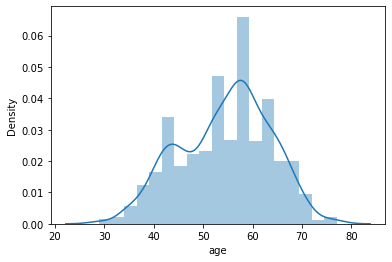

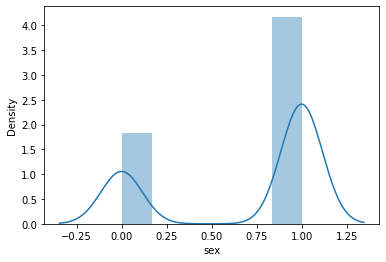

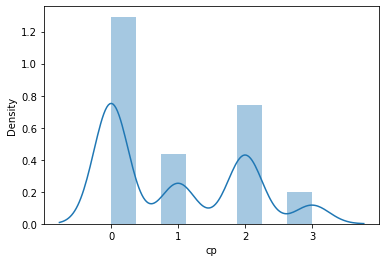

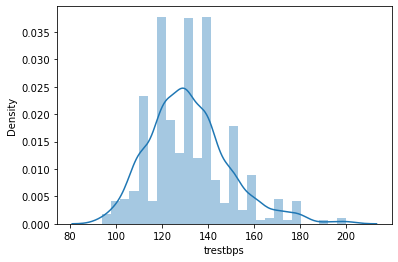

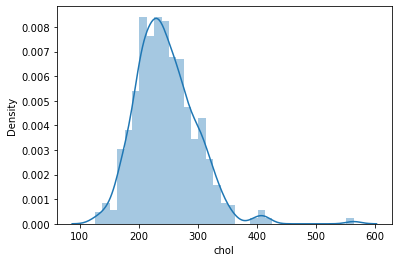

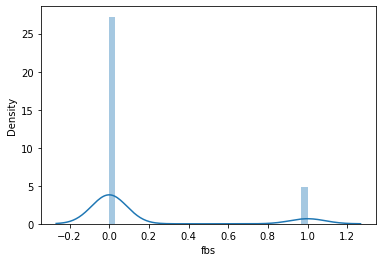

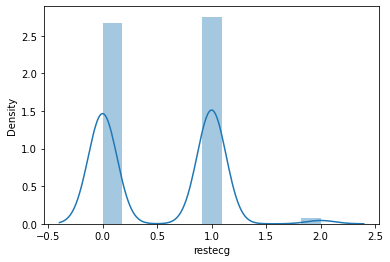

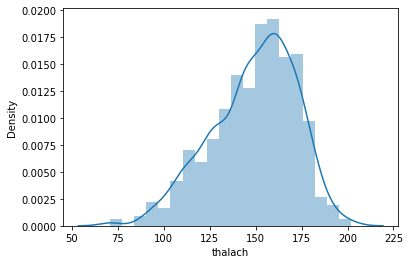

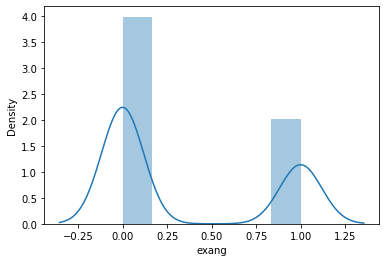

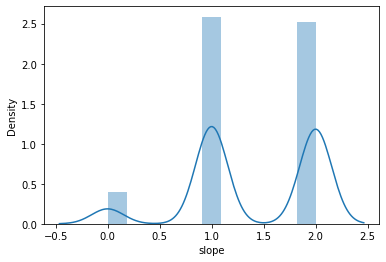

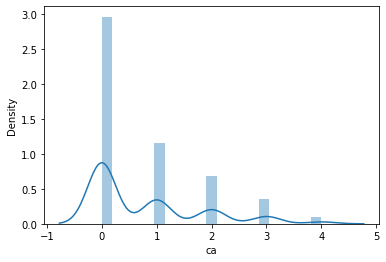

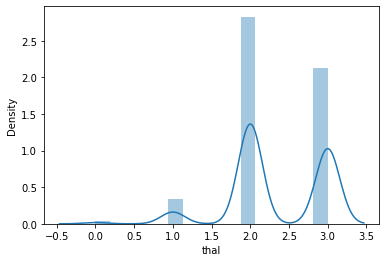

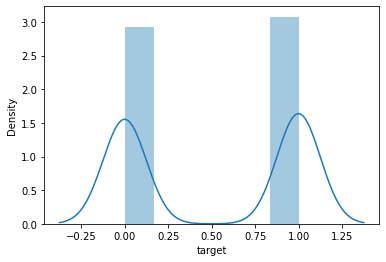

In [24]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

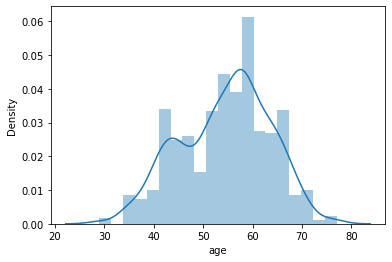

In [25]:
sns.distplot(df['age'], bins=20)

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ca', ylabel='Density'>

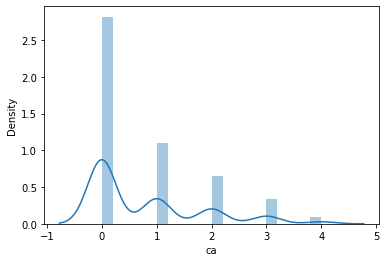

In [26]:
sns.distplot(df['ca'], bins=20)

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

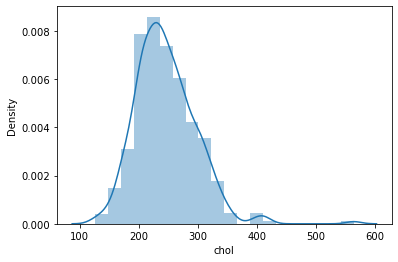

In [27]:
sns.distplot(df['chol'], bins=20)

# Variable Qualitative

In [30]:
df["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [33]:
for col in df.select_dtypes('int64'):
    print(f'{col :-<10}, {df[col].unique()}')

age-----------------------------------------------, [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex-----------------------------------------------, [1 0]
cp------------------------------------------------, [0 1 2 3]
trestbps------------------------------------------, [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol----------------------------------------------, [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 

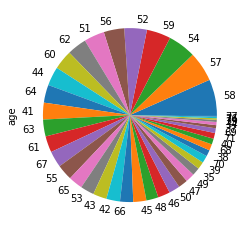

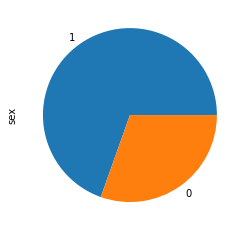

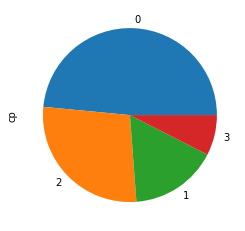

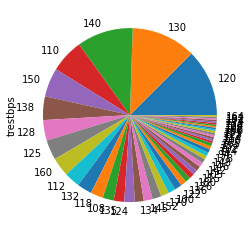

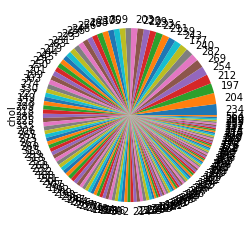

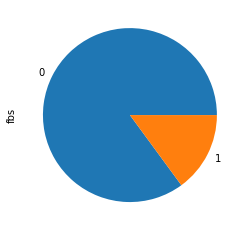

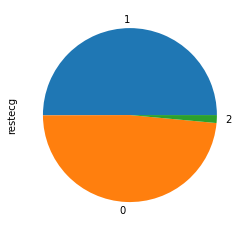

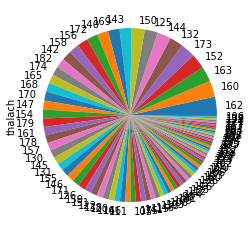

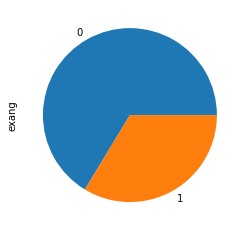

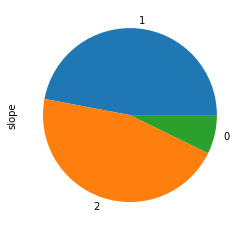

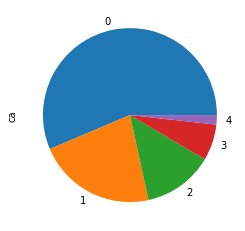

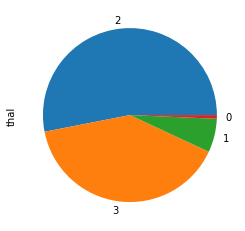

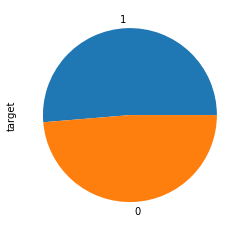

In [34]:
for col in df.select_dtypes('int64'):
    plt.figure()
    df[col].value_counts().plot.pie()

# Relation Target/Variable

# creation de sous-ensemble positifs et negatifs

In [36]:
df_positive = df[df["target"] == 1]

In [35]:
df_negative = df[df["target"] == 0]

In [37]:
df_positive

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
5      58    0   0       100   248    0        0      122      0      1.0   
10     71    0   0       112   149    0        1      125      0      1.6   
12     34    0   1       118   210    0        1      192      0      0.7   
15     34    0   1       118   210    0        1      192      0      0.7   
16     51    0   2       140   308    0        0      142      0      1.5   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1011   45    1   1       128   308    0        0      170      0      0.0   
1014   44    0   2       108   141    0        1      175      0      0.6   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1023   50    0   0       110   254    0        0      159      0      0.0   

      slope  ca  thal  target  
5         1   0     2       1  
10        1   0     2       1  
12        2   0     2       1  
15        2   0     2       1  
16        2   1     2       1  
...     ...  ..   ...     ...  
1011      2   0     2       1  
1014      1   0     2       1  
1019      2   0     2       1  
1020      2   0     2       1  
1023      2   0     2       1  

[526 rows x 14 columns]

In [41]:
quantitative_columns = df[['chol', 'thalach', 'oldpeak', 'trestbps', 'age']]

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

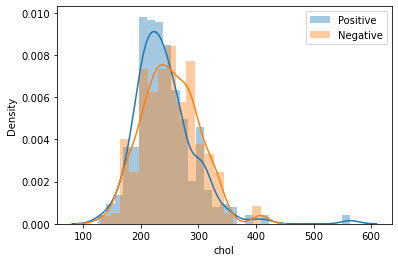

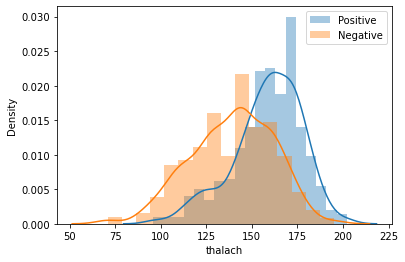

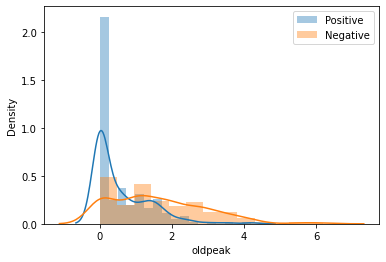

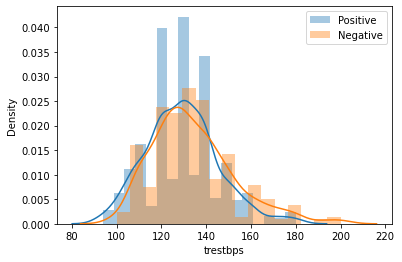

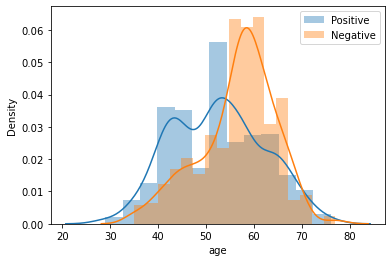

In [43]:
for col in quantitative_columns:
    plt.figure()
    sns.distplot(df_positive[col], label='Positive')
    sns.distplot(df_negative[col], label='Negative')
    plt.legend()

# Target & Age

<AxesSubplot:xlabel='age', ylabel='count'>

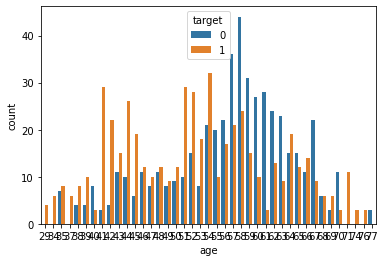

In [44]:
sns.countplot(x = 'age', hue = 'target', data=df)

In [46]:
pd.crosstab(df["target"], df['cp'])

cp        0    1    2   3
target                   
0       375   33   65  26
1       122  134  219  51

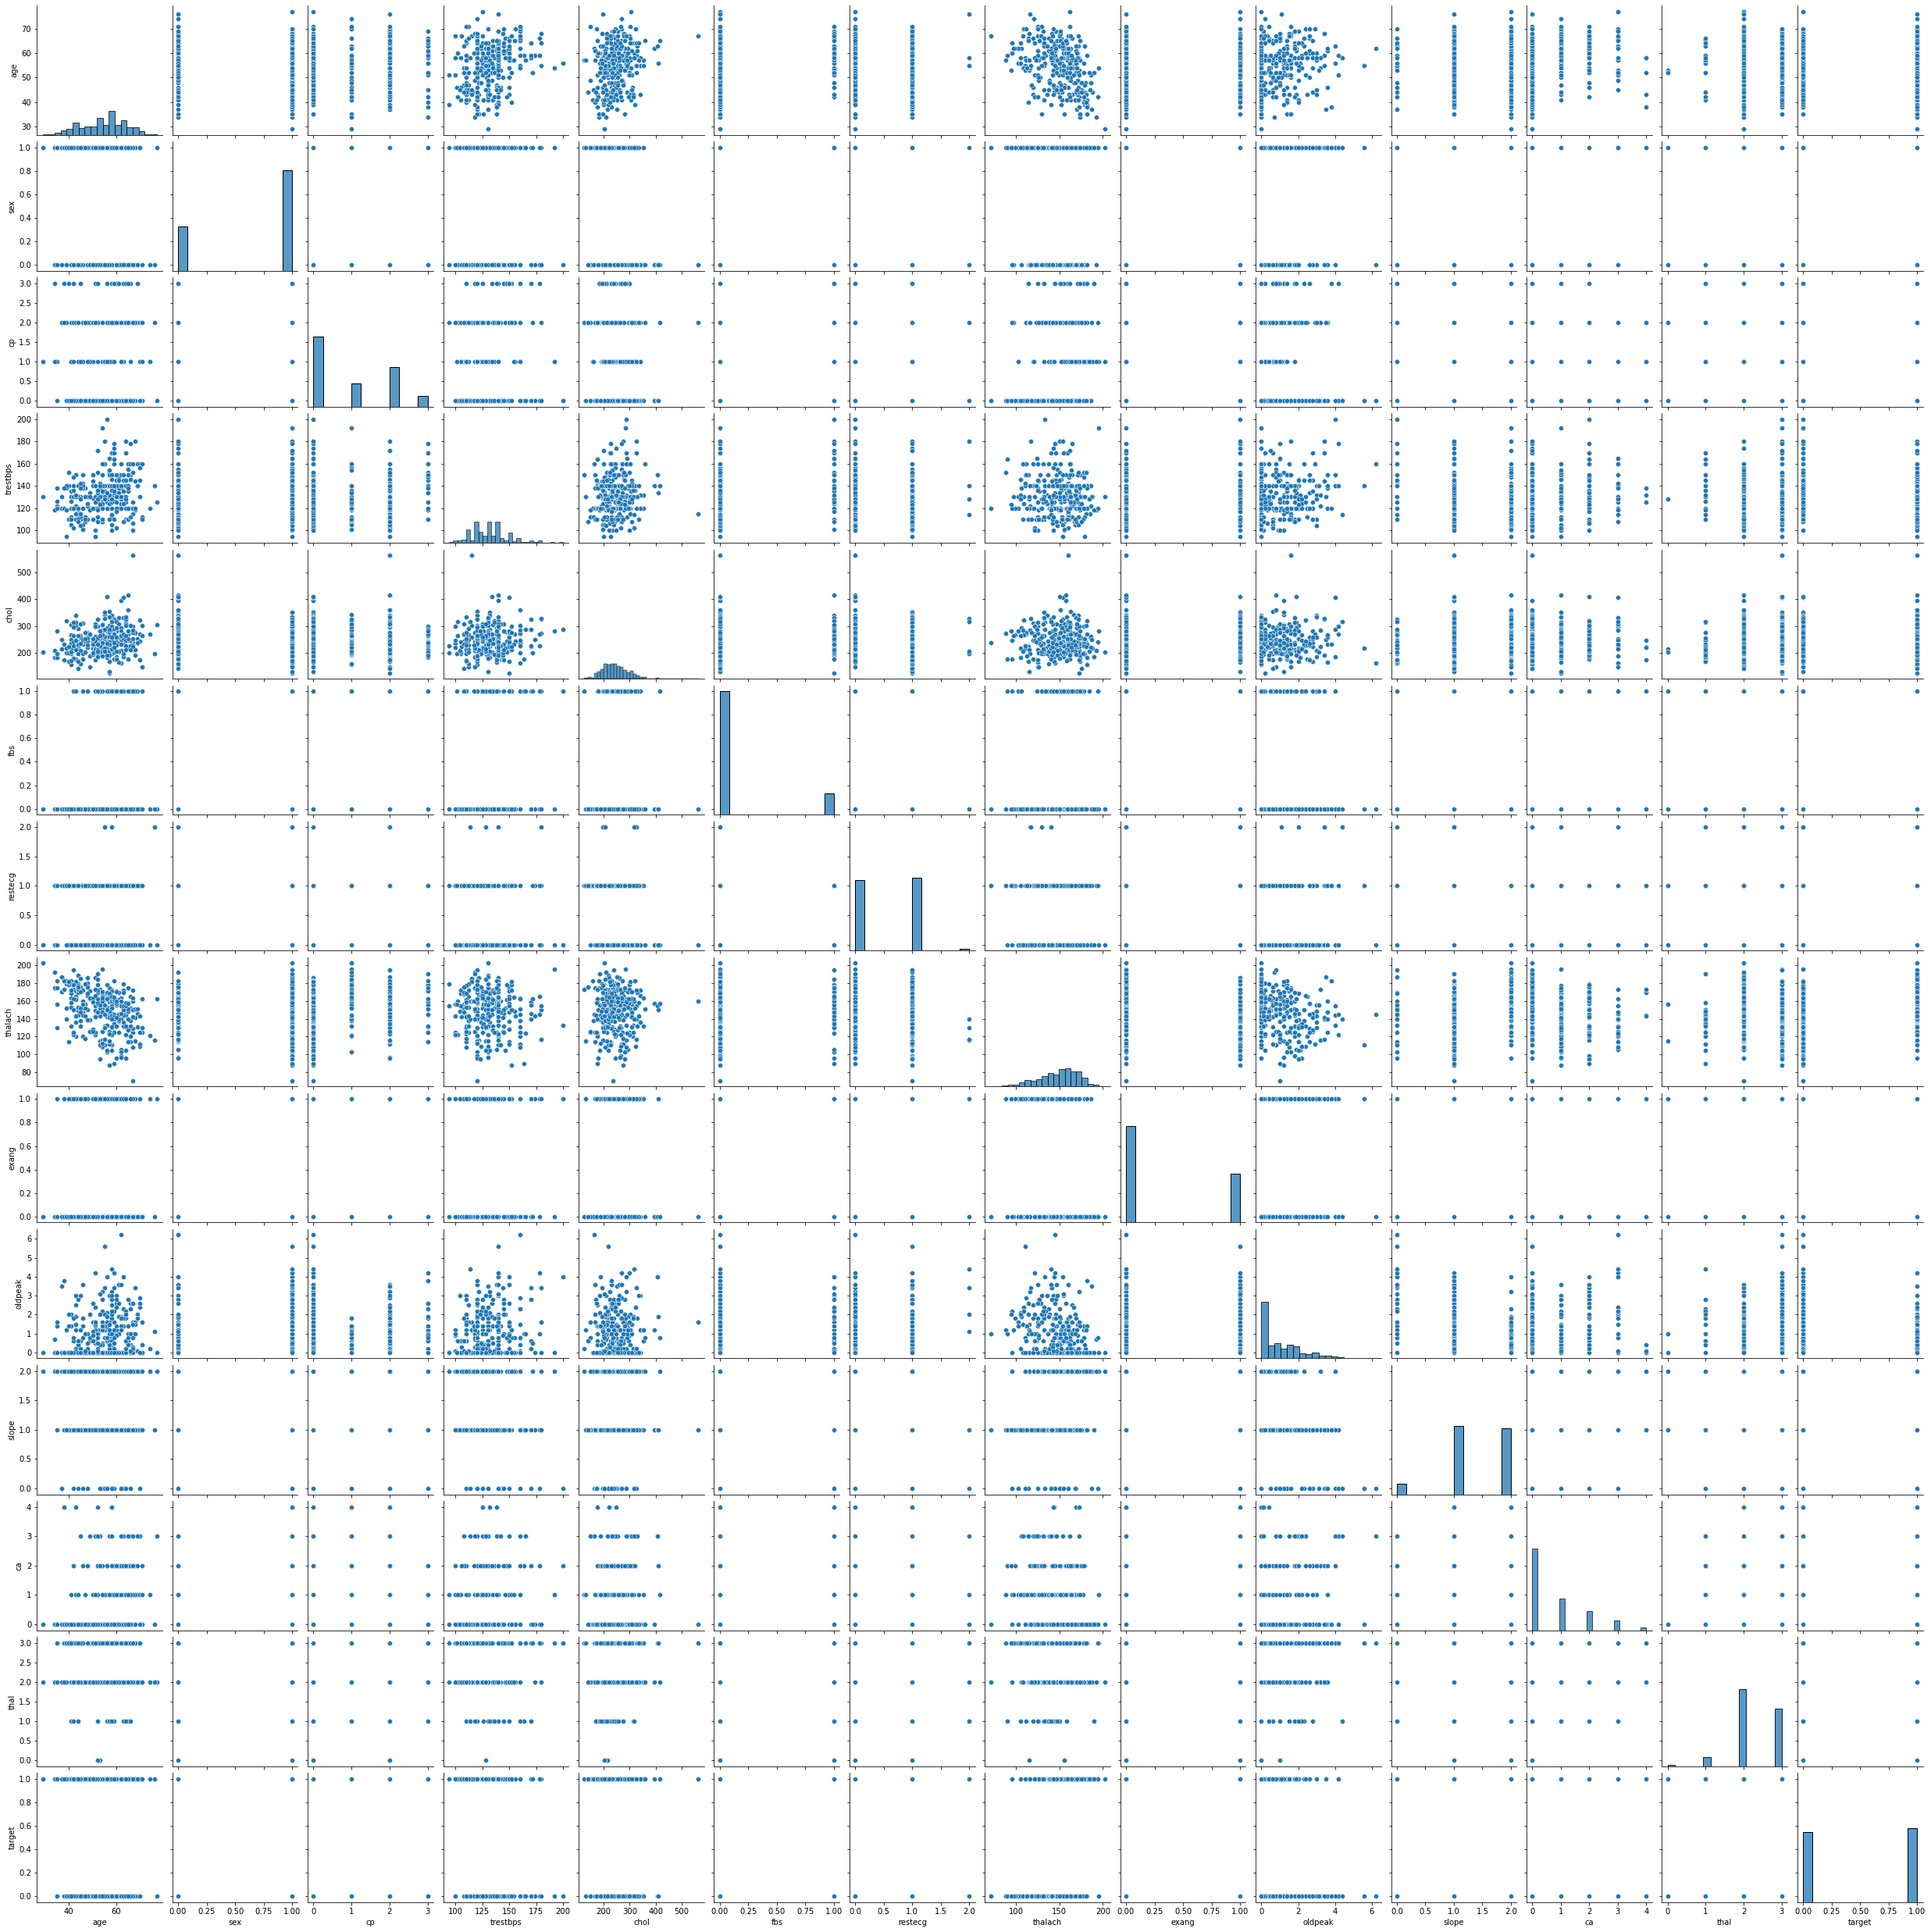

In [47]:
sns.pairplot(df)

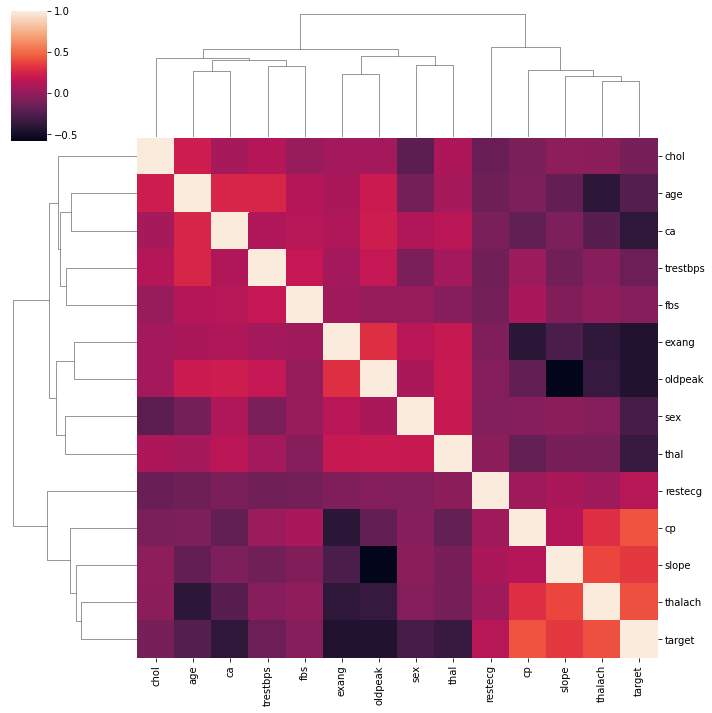

In [48]:
sns.clustermap(df.corr())

<ipython-input-50-6569675a5a32>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

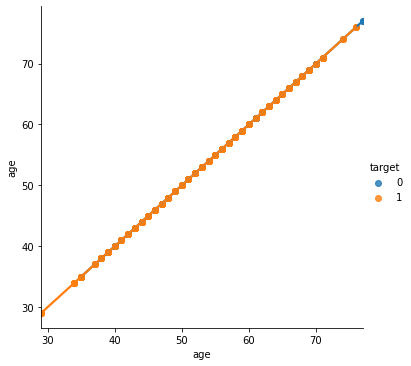

<Figure size 432x288 with 0 Axes>

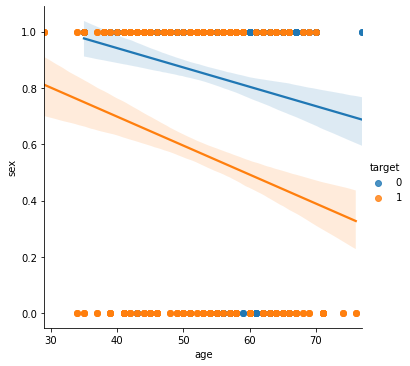

<Figure size 432x288 with 0 Axes>

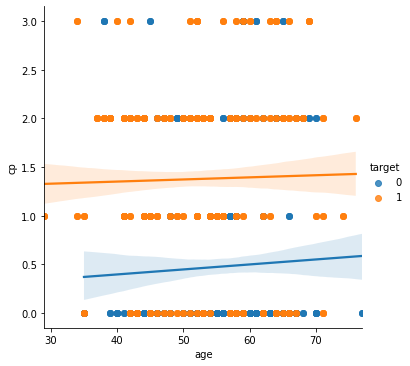

<Figure size 432x288 with 0 Axes>

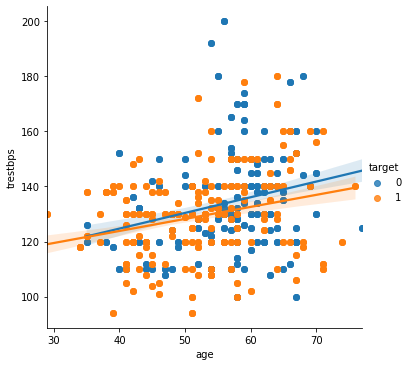

<Figure size 432x288 with 0 Axes>

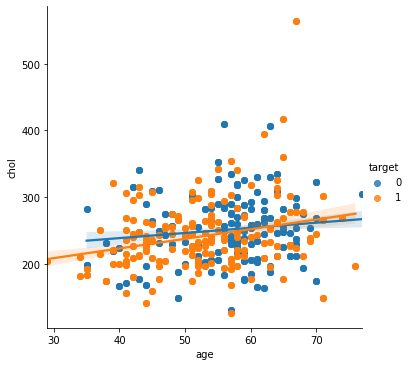

<Figure size 432x288 with 0 Axes>

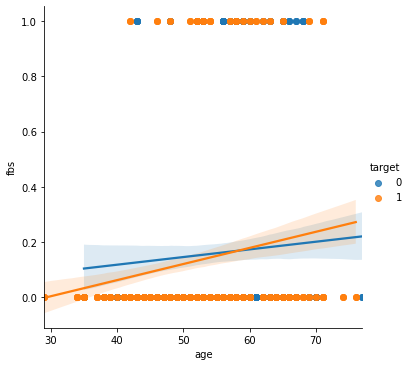

<Figure size 432x288 with 0 Axes>

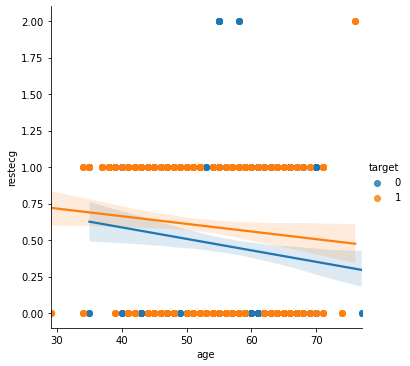

<Figure size 432x288 with 0 Axes>

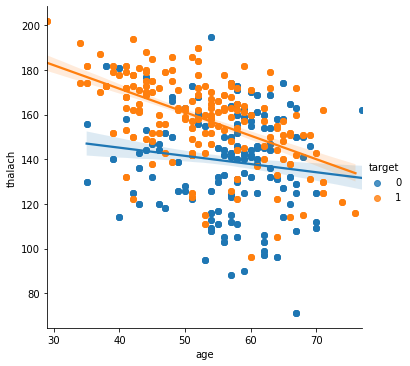

<Figure size 432x288 with 0 Axes>

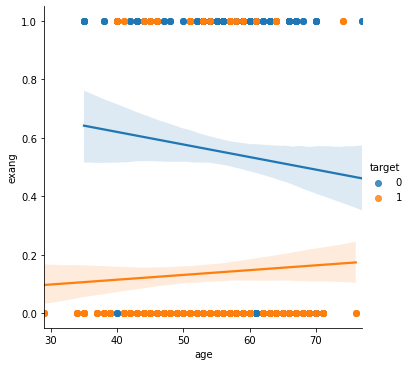

<Figure size 432x288 with 0 Axes>

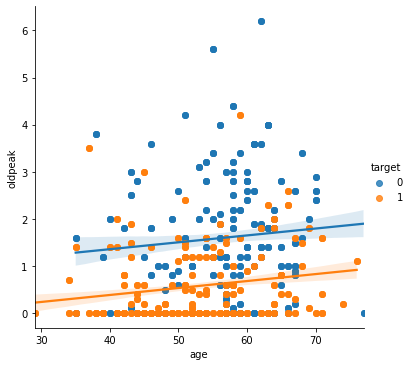

<Figure size 432x288 with 0 Axes>

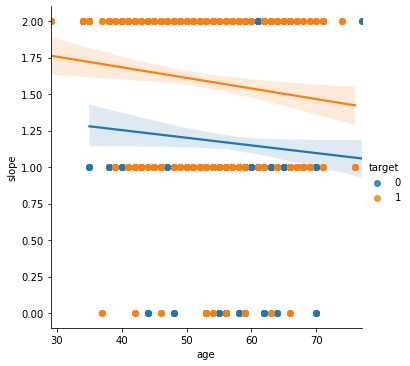

<Figure size 432x288 with 0 Axes>

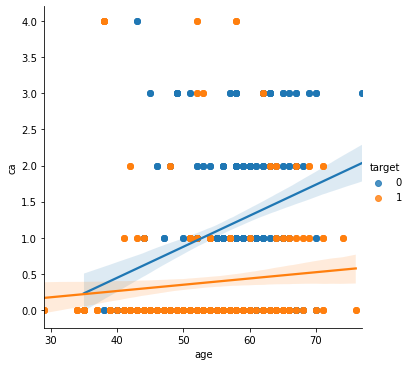

<Figure size 432x288 with 0 Axes>

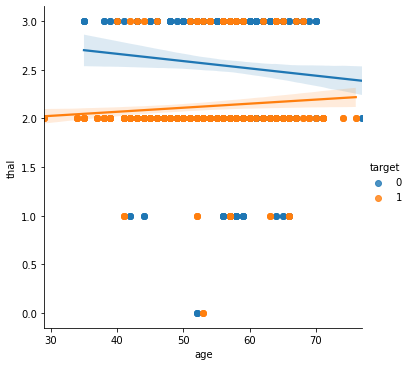

<Figure size 432x288 with 0 Axes>

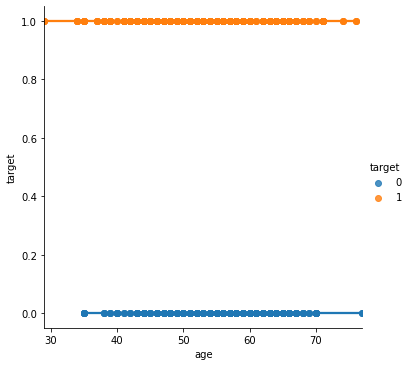

In [50]:
for col in df:
    plt.figure()
    sns.lmplot(x='age', y=col, hue='target', data=df)

In [51]:
pd.crosstab(df['chol'], df['restecg'])

restecg  0  1  2
chol            
126      0  3  0
131      0  3  0
141      0  3  0
149      4  4  0
157      0  4  0
...     .. .. ..
394      3  0  0
407      4  0  0
409      3  0  0
417      3  0  0
564      3  0  0

[152 rows x 3 columns]

In [54]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model prepration

In [56]:
from sklearn.model_selection import train_test_split

In [10]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [9]:
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  


In [11]:
#we will use a standard scaler to scale the features for preprocessing

scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [13]:
#Creating a logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

## Accuracy of the model:

In [14]:
score = accuracy_score(y_test, pred)
score

0.7951219512195122

In [15]:
#Creating a confusion matrix
confusion_matrix(y_test, pred)


array([[73, 29],
       [13, 90]], dtype=int64)

In [16]:
#Extractin TP, TN, FP, FN
tp, fp, tn, fn = confusion_matrix(y_test, pred).ravel()
(tp, fp, tn, fn)

(73, 29, 13, 90)

In [18]:
matrix = classification_report(y_test, pred)
print("Classification report : \n", matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

